## DEMO/Exercise 1 Bias-variance trade off visualized

Instruction: Run the following cells below and answer the questions at the end

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Parameters

In [ ]:
# Frontmatter

np.random.seed(123)
MARKER_SIZE = 100
DATA_COLOR = 'black'
ERROR_COLOR = 'darkred'
POLYNOMIAL_FIT_COLORS = ['orange', 'royalblue', 'darkgreen']
LEGEND_FONTSIZE = 14
TITLE_FONTISIZE = 16
N_OBSERVATIONS = 100
NOISE_STD = 0.75

## Generate data

(-2.0, 2.0)

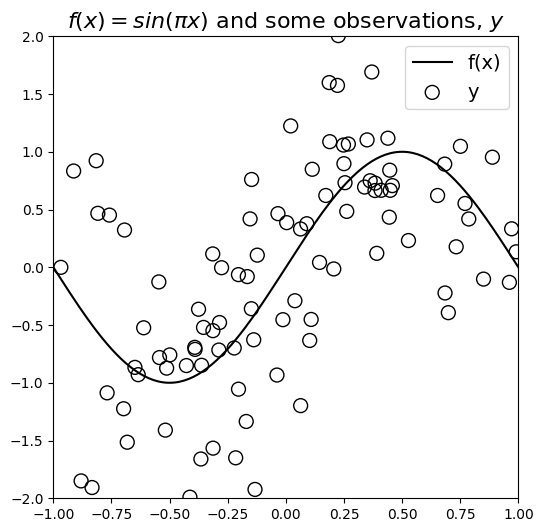

In [ ]:
x = 2 * (np.random.rand(N_OBSERVATIONS) - .5)
x_grid = np.linspace(-1,1 , 200)


def f(x):
    """Base function"""
    return np.sin(x * np.pi)


def sample_fx_data(shape, noise_std=NOISE_STD):
    return f(x) + np.random.randn(*shape) * noise_std


def plot_fx_data(y=None):
    """Plot f(x) and noisy samples"""
    y = y if y is not None else sample_fx_data(x.shape)
    fig, axs = plt.subplots(figsize=(6, 6))
    plt.plot(x_grid, f(x_grid), color=DATA_COLOR, label='f(x)')
    plt.scatter(x, y, s=MARKER_SIZE, edgecolor=DATA_COLOR, facecolors='none', label='y')


# Plot the data
y = sample_fx_data(x.shape)
plot_fx_data(y)
plt.legend(fontsize=14)
plt.title(f'$f(x) = sin(\pi x)$ and some observations, $y$', fontsize=16)
plt.xlim([-1, 1])
plt.ylim([-2, 2])

## Visuzlization of different polynomials fits

Text(0.5, 1.0, 'Various Polynomial Functions Fit to Observations')

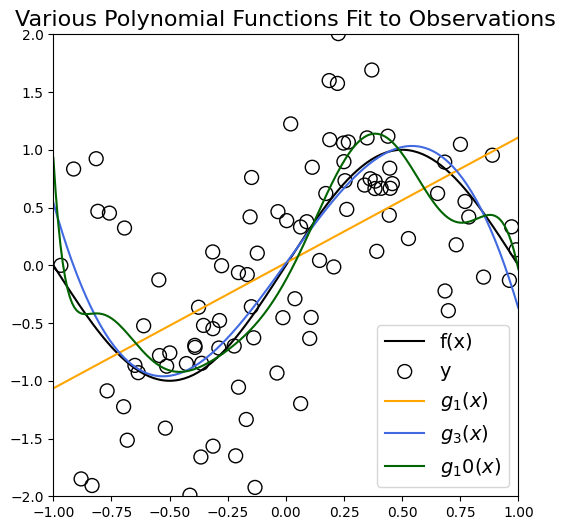

In [ ]:
plot_fx_data(y)

polynomial_degrees = [1,3,10]
theta = {}
fit = {}
for ii, degree in enumerate(polynomial_degrees):
    # Note: we should get an overconditioned warning for degree 10 because of extreme overfitting
    theta[degree] = np.polyfit(x, y, degree)
    fit[degree] = np.polyval(theta[degree], x_grid)
    plt.plot(x_grid, fit[degree], POLYNOMIAL_FIT_COLORS[ii], label=f"$g_{degree}(x)$")
plt.legend(fontsize=LEGEND_FONTSIZE)
plt.xlim([-1, 1])
plt.ylim([-2, 2])
plt.title("Various Polynomial Functions Fit to Observations", fontsize=TITLE_FONTISIZE)

Text(0.5, 0.98, 'Model Fits Given Random Samples Around f(x)')

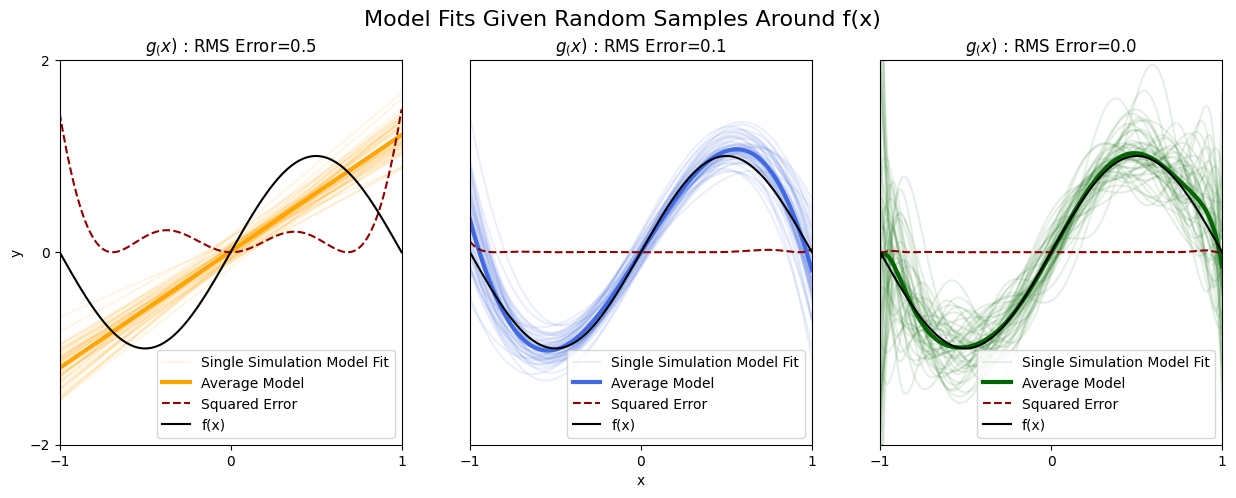

In [ ]:
from collections import defaultdict

n_simulations = 50
simulation_fits = defaultdict(list)
for sim in range(n_simulations):
    # Start from same samples
    y_simulation = sample_fx_data(x.shape)
    for degree in polynomial_degrees:
        # Note: we should get an overconditioned warning
        # for degree 10 because of extreme overfitting
        theta_tmp = np.polyfit(x, y_simulation, degree)
        simulation_fits[degree].append(np.polyval(theta_tmp, x_grid))


def error_function(pred, actual):
    return (pred - actual) ** 2


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ii, degree in enumerate(polynomial_degrees):
    plt.sca(axs[ii])
    for jj, fit in enumerate(simulation_fits[degree]):
        label = 'Single Simulation Model Fit' if jj == 0 else None
        plt.plot(x_grid, fit, color=POLYNOMIAL_FIT_COLORS[ii], alpha=.1, label=label)

    average_fit = np.array(simulation_fits[degree]).mean(0)
    squared_error = error_function(average_fit, f(x_grid))
    rms = np.sqrt((squared_error.mean()))
    plt.plot(x_grid, average_fit, color=POLYNOMIAL_FIT_COLORS[ii], linewidth=3, label='Average Model')
    plt.plot(x_grid, squared_error, '--', color=ERROR_COLOR, label='Squared Error')
    plt.plot(x_grid, f(x_grid), color='black', label='f(x)')
    plt.yticks([])
    if ii == 1:
        plt.xlabel('x')
    elif ii == 0:
        plt.ylabel('y')
        plt.yticks([-2, 0, 2])

    plt.xlim([-1, 1])
    plt.ylim([-2, 2])
    plt.xticks([-1, 0, 1])
    plt.title(f"$g_(x)$ : RMS Error={np.round(rms, 1)}")
    plt.legend(loc='lower right')
plt.suptitle('Model Fits Given Random Samples Around f(x)', fontsize=TITLE_FONTISIZE)

### Questions

On a visualization below we train three polynomial models.  
Each model is trained 50 times on a randomly generated different training dataset.
Shallow lines show a performance of a single model, while the thick line show mean of all the models

1. Based on the visualization, which model has the largest and smallest variance? How did you make this conclusion?

Первая модель, кажется, имеет меньшую вариацию, так как линии, изображающие single models, расположены былиже к среднему значению всех моделей, в то время как у третьей модели мы видим значительные колебания и отклонения от среднего, а значит и бОльшую дисперсию
2. Which has the largest and smallest bias (hint: RMSE)?

самое большое смешение у первой модели, а самое маленькое - у третьей
3. If you would need to fit a single polynome model on one training dataset, which model you would choose out of these three?

я бы выбрала 2 модель, так как она оптимальная с точки зрения trade off между дисперсией и смещением

## Exercise 2: Regression, overfitting and trees

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from math import pi as PI
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

# for reproducibility across different runs, one may set a seed as follows:
# np.random.seed(42)

### Task 1

In the code below generate a random noise vector of length NUM_OBS using np.random.normal function and add the noise to the target variable

Docs: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [ ]:
# number of observations
NUM_OBS = 150

# predictors
x = np.linspace(0, 4, num = NUM_OBS)
# noise
eps = np.random.normal(size=150)
# outcome
y = np.sin(PI*x) + eps

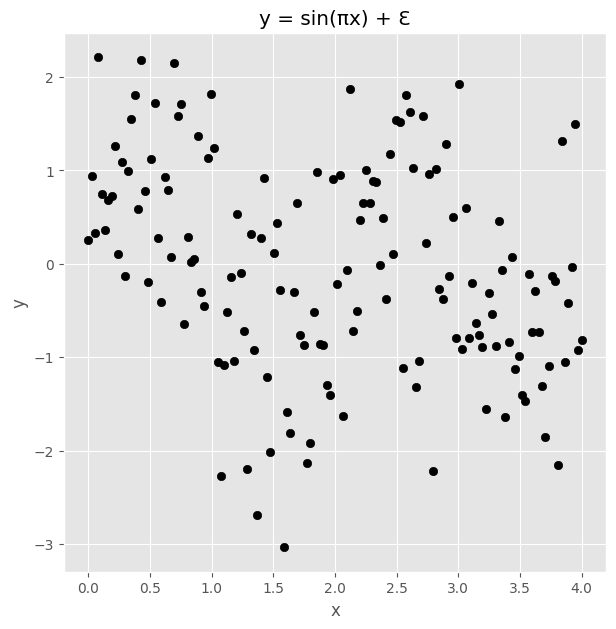

In [ ]:

fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x, y, c = 'k')

### Task 2

Create test train split using sklearn train_test_split function with test size 20%  
You can search the docs for train_test_split in https://scikit-learn.org/stable/ or search in earlier homeworks

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)

In [ ]:
a=pd.DataFrame()
a['x_train']=x_train
a['y_train']=y_train
a=a.sort_values(by='x_train')
x_train=a['x_train'].values
y_train=a['y_train'].values

a=pd.DataFrame()
a['x_test']=x_test
a['y_test']=y_test
a=a.sort_values(by='x_test')
x_test=a['x_test'].values
y_test=a['y_test'].values

### Task 3

The code below visulizes training set.  
Add test set visualization in the same figure and label it "Train set"

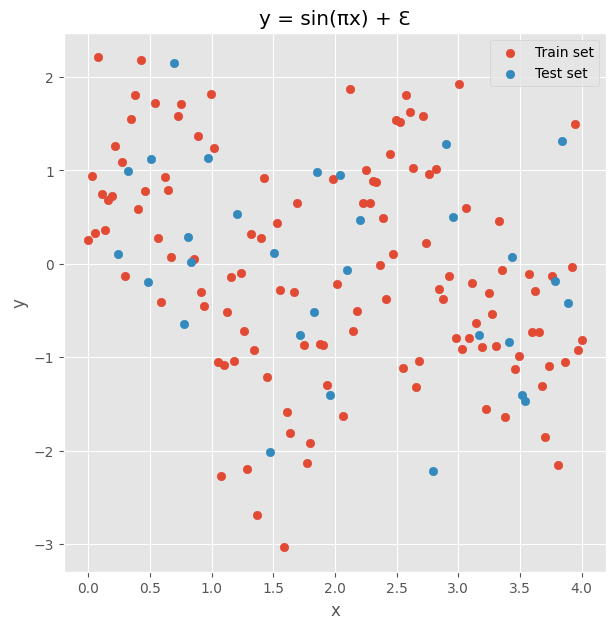

In [ ]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, label = "Train set")
ax.scatter(x_test, y_test, label = "Test set")
ax.legend()

## Fitting polynomial

In the task below we fit a polynom into the training and testing dataset, visualize the error and print MSE

Task: Changing k either manually or by constructing for loop, describe how does error for test and train behave as k grows.
Вначале значение ошибки уменьшается как на train, так и на test. Однако в дальнейшем при увеличении k происходит overfitting и ошибка на test снова начинает расти

Is there a value of k, when it does not make sense to grow it anymore. Why? да, при к = 7 значение ошибки на тестовой выборке снова начинает расти

NOTE: If you did everything correct so far your plot will look similar to the one which is now printed under the cell

Train MSE 1.1958089743673288 Test MSE 0.9758607223195473
Train MSE 1.1784716365072354 Test MSE 0.9468905798460295
Train MSE 1.0790876199261026 Test MSE 1.060450518758867
Train MSE 1.07767733122564 Test MSE 1.0668270085577067
Train MSE 0.854851973612605 Test MSE 1.0601503407245747
Train MSE 0.8539742793210403 Test MSE 1.0613852552654
Train MSE 0.8234380625543193 Test MSE 1.0016737140442686
Train MSE 0.8234301761610667 Test MSE 1.00183868478082


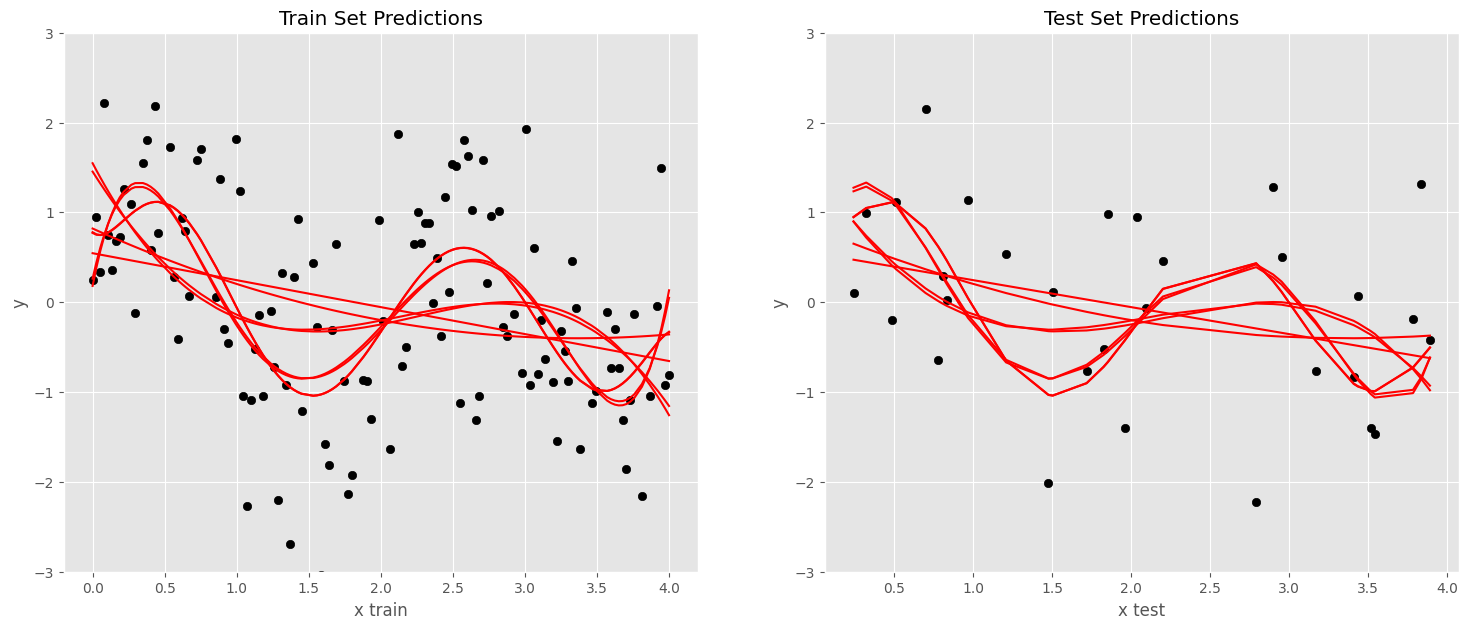

In [ ]:


fig, axs = plt.subplots(1, 2, figsize = (18,7))

axs[0].set_title('Train Set Predictions')
axs[1].set_title('Test Set Predictions')

axs[0].set_xlabel("x train")
axs[0].set_ylabel("y")
axs[0].set_ylim([-3, 3])

axs[1].set_xlabel("x test")
axs[1].set_ylabel("y")
axs[1].set_ylim([-3, 3])

axs[0].scatter(x_train, y_train, c = 'k', label = "y train")
axs[1].scatter(x_test, y_test, c = 'k', label = "y test")



for k in range(8):

  # k-th degree polynomial coefficients
  fit_coeff = np.polyfit(x_train, y_train, deg = k+1)

  # train and test k-th degree polynomial fit
  y_train_pred = np.polyval(fit_coeff, x_train)
  y_test_pred = np.polyval(fit_coeff, x_test)

  # train and test MSE of k-th degree polynomial fit
  iter_train_mse = mean_squared_error(y_train_pred, y_train)
  iter_test_mse = mean_squared_error(y_test_pred, y_test)

  # plot train and test k-th degree polynomial fit
  axs[0].plot(x_train,
                  y_train_pred,
                  color = 'red',
                  label = "deg: {}".format(k+1))

  axs[1].plot(x_test,
                  y_test_pred,
                  color = 'red',
                  label = "deg: {}".format(k+1))

  print(f"""Train MSE {iter_train_mse} Test MSE {iter_test_mse}""")

## Fitting regression tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
x_train=x_train.reshape(-1, 1)
y_train=y_train.reshape(-1, 1)
x_test=x_test.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)

### Task 4

Add DecisionTreeRegressor as a model below and try different max_depth values. What happens as you increase max_depth parameter in the tree? вначале глубина дерева уменьшает значение ошибки, но начиная с шести она снова начинает расти на тестовых данных, что свидетельсивует о переобучении
You can search the docs for DecisionTreeRegressor in https://scikit-learn.org/stable/

Train MSE 0.41076278873595323 Test MSE 1.485860000687829


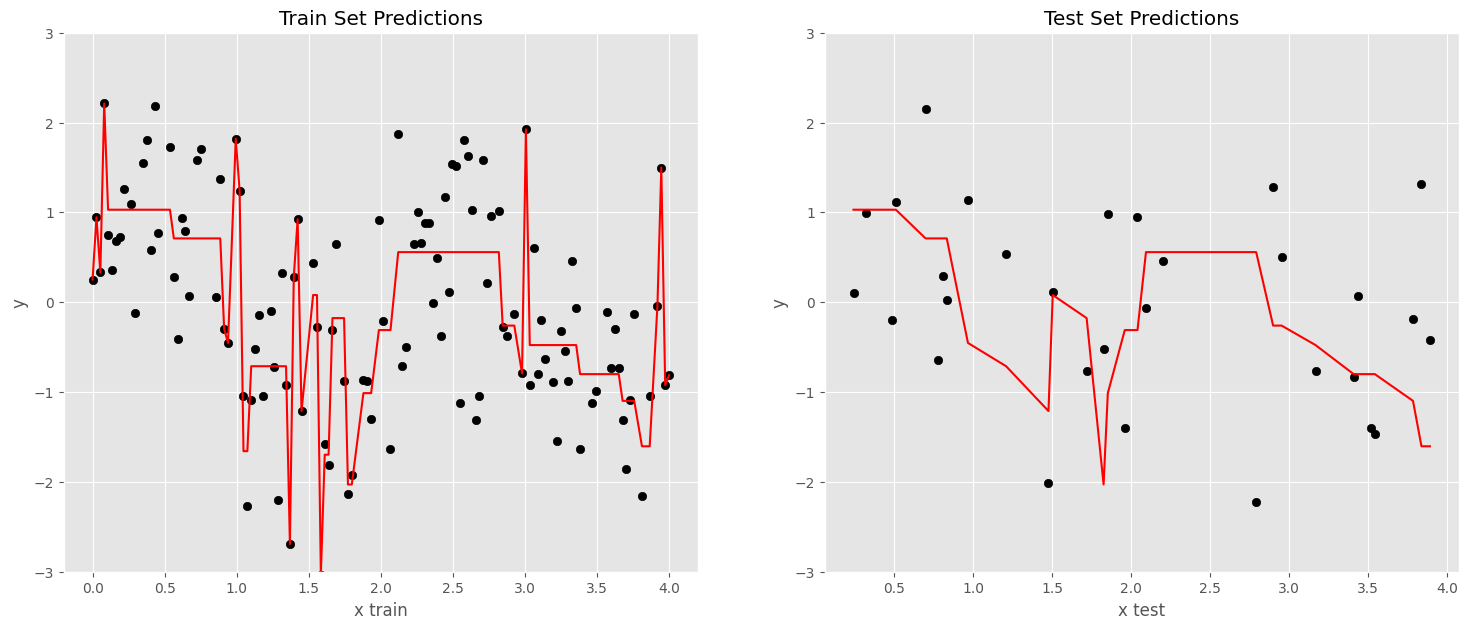

In [ ]:


fig, axs = plt.subplots(1, 2, figsize = (18,7))

axs[0].set_title('Train Set Predictions')
axs[1].set_title('Test Set Predictions')

axs[0].set_xlabel("x train")
axs[0].set_ylabel("y")
axs[0].set_ylim([-3, 3])

axs[1].set_xlabel("x test")
axs[1].set_ylabel("y")
axs[1].set_ylim([-3, 3])

axs[0].scatter(x_train, y_train, c = 'k', label = "y train")
axs[1].scatter(x_test, y_test, c = 'k', label = "y test")


depth = 6
model = DecisionTreeRegressor(max_depth=depth, random_state=42)
model.fit(x_train.reshape(-1, 1), y_train)


# train and test k-th degree polynomial fit
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# train and test MSE of k-th degree polynomial fit
iter_train_mse = mean_squared_error(y_train_pred, y_train)
iter_test_mse = mean_squared_error(y_test_pred, y_test)

# plot train and test k-th degree polynomial fit
axs[0].plot(x_train,
                y_train_pred,
                color = 'red',
                label = "deg: {}".format(k+1))

axs[1].plot(x_test,
                y_test_pred,
                color = 'red',
                label = "deg: {}".format(k+1))

print(f"""Train MSE {iter_train_mse} Test MSE {iter_test_mse}""")

### Task 4

Copy the full code in the cell below and replace the model with RandomForestRegressor

Try different n_estimators and max_depth.
What happens to prediction as we increase n_estimators? Why? Получаемая модель вначале улучшается, а затем ошибка снова начинает расти.

If you have same max depth for the normal tree above and the radom forest which of them predicts better? radom forest лучше предсказывает значения при одинаковой максимальной глубине
Is fitted function more smooth for forest or for the normal tree? Why?
в random forest функция получается более сглаженной, так как в задаче регресии алгоритм берет среднее значение для каждого дерева в random forest и она становится менее подвержена выбросам и случайным колебаниям

<ipython-input-39-bf96186ee7cf>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Train MSE 0.7087721795851042 Test MSE 1.0139196020862802


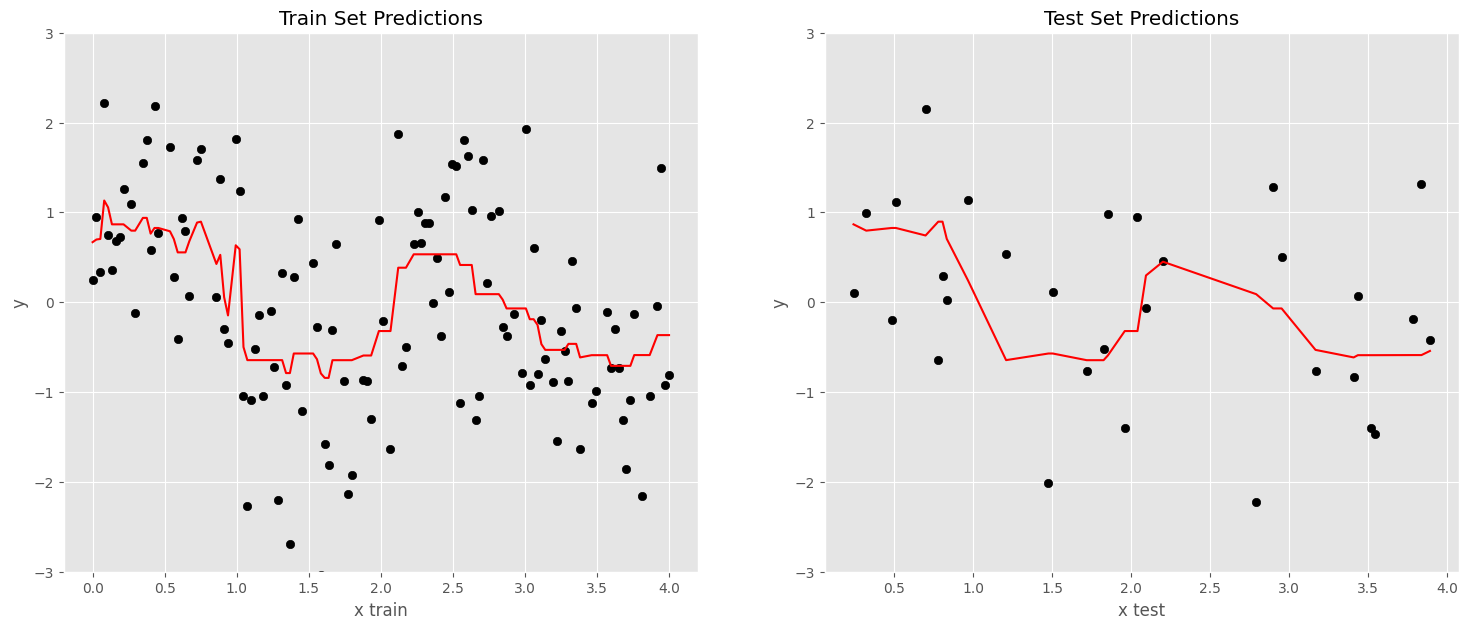

In [ ]:


fig, axs = plt.subplots(1, 2, figsize = (18,7))

axs[0].set_title('Train Set Predictions')
axs[1].set_title('Test Set Predictions')

axs[0].set_xlabel("x train")
axs[0].set_ylabel("y")
axs[0].set_ylim([-3, 3])

axs[1].set_xlabel("x test")
axs[1].set_ylabel("y")
axs[1].set_ylim([-3, 3])

axs[0].scatter(x_train, y_train, c = 'k', label = "y train")
axs[1].scatter(x_test, y_test, c = 'k', label = "y test")


# k-th degree polynomial coefficients
model = RandomForestRegressor(n_estimators=13, max_depth=3)
model.fit(x_train, y_train)


# train and test k-th degree polynomial fit
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# train and test MSE of k-th degree polynomial fit
iter_train_mse = mean_squared_error(y_train_pred, y_train)
iter_test_mse = mean_squared_error(y_test_pred, y_test)

# plot train and test k-th degree polynomial fit
axs[0].plot(x_train,
                y_train_pred,
                color = 'red',
                label = "deg: {}".format(k+1))

axs[1].plot(x_test,
                y_test_pred,
                color = 'red',
                label = "deg: {}".format(k+1))

print(f"""Train MSE {iter_train_mse} Test MSE {iter_test_mse}""")